In [216]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad, EigenGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from PIL import Image
from albumentations.pytorch import ToTensorV2
import torch
import torchvision.transforms as transforms
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import cv2
from model.model import convnext_base

In [272]:
model = convnext_base(num_classes=5)
model.load_state_dict(torch.load('/opt/ml/input/work_dir/arcface_oil/best/best_10.pth'))
for param in model.parameters():
    param.requires_grad = True
img = cv2.imread('../data/val/JPEGImages/00016NBC_val.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
val_trasform = A.Compose([
                        # A.LongestMaxSize(),
                        # A.PadIfNeeded(border_mode=cv2.BORDER_CONSTANT, value=0),
                        A.Resize(384, 512),
                        # A.Normalize(mean=(0.65490196, 0.53333333,0.45882353),
                        #             std=(0.18431373, 0.16078431, 0.14901961)),
                        ToTensorV2()
                    ])
img = val_trasform(image=img)['image']
target_layers = [model.stages[3][0].dwconv]
target = torch.argmax(model(img.unsqueeze(0).to(torch.float)))
targets = [ClassifierOutputTarget(target.item())]
cam = EigenCAM(model=model, target_layers=target_layers, use_cuda=True)

In [273]:
grayscale_cam = cam(input_tensor=img.unsqueeze(0).to(torch.float), targets=targets)

In [274]:
print(img.size())

torch.Size([3, 384, 512])


In [275]:
img = img.permute(1, 2, 0)
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(np.array(img)/255., grayscale_cam, use_rgb=True)

1


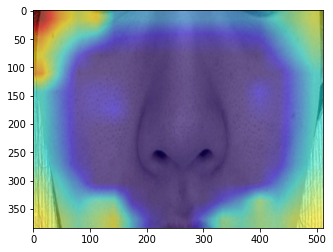

In [276]:
print(target.item())
plt.imshow(visualization)

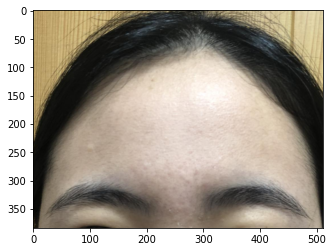

In [72]:
plt.imshow(img)

In [196]:
print(model)

ConvNeXt(
  (downsample_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm()
    )
    (1): Sequential(
      (0): LayerNorm()
      (1): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    )
    (2): Sequential(
      (0): LayerNorm()
      (1): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    )
    (3): Sequential(
      (0): LayerNorm()
      (1): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    )
  )
  (stages): ModuleList(
    (0): Sequential(
      (0): Block(
        (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
        (norm): LayerNorm()
        (pwconv1): Linear(in_features=128, out_features=512, bias=True)
        (act): GELU()
        (pwconv2): Linear(in_features=512, out_features=128, bias=True)
        (drop_path): Identity()
      )
      (1): Block(
        (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), g